In [79]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [80]:

# Импортируем датасет твитов-отзывов об американских авиакомпаниях.
# В датасете представлены отзывы, размеченные как позитивные, негативные, нейтральные.
# Цель - на основе датасета построить модель, классифицирующую новые отзывы

# source: https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment?select=Tweets.csv

df = pd.read_csv(r"C:\Users\chist\Desktop\ML\UNZIP_ME_FOR_NOTEBOOKS_ML_RUS_V1\DATA\airline_tweets.csv")
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


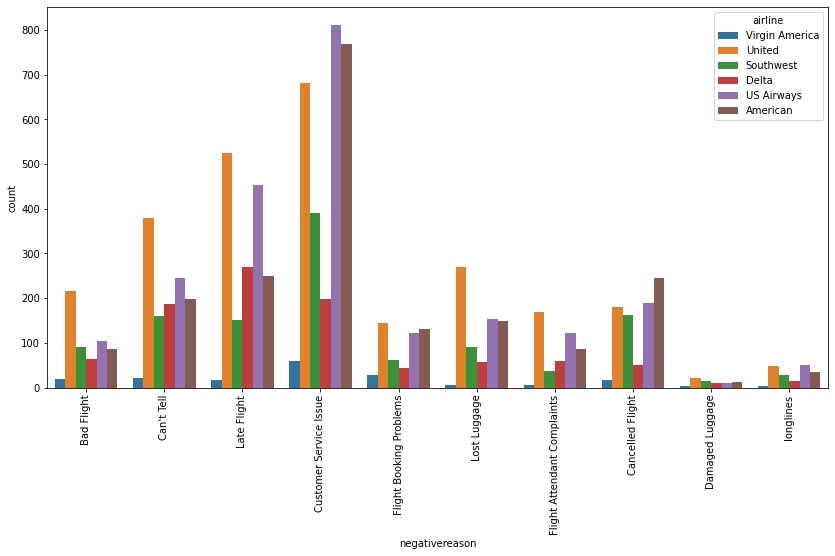

In [81]:
# график, количественно иллюстрирующий причины негативных отзывов с разбивкой по авиакомпаниям

plt.figure(figsize=(14,7))
sns.countplot(data=df, x='negativereason', hue='airline')
plt.xticks(rotation=90);

In [82]:
# отставляем в датасете искомые переменные (класс отзыва) и тексты твитов,
# на которых будем обучать модель

data = df[['airline_sentiment', 'text']]
data

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


In [83]:
X = data['text']
y = data['airline_sentiment']

In [84]:
# производим сначала разбиение данных, а потом векторизацию, воизбежание утечки данных в тестовый набор

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [85]:
# векторизируем слова в твитах-отзывах

from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(stop_words='english')
vec.fit(X_train)
X_train_vec = vec.transform(X_train)
X_test_vec = vec.transform(X_test)

In [86]:
# создаем и обучаем модель - Наивный байесовский классификатор

from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train_vec, y_train)


MultinomialNB()

In [87]:
# также дополнительно создаем и обучаем еще несколько моделей:
# логистическую регрессию и два варианта моделей по методу опорных векторов

from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_vec, y_train)

LogisticRegression(max_iter=1000)

In [88]:
from sklearn.svm import SVC, LinearSVC
rbf_svc = SVC()
rbf_svc.fit(X_train_vec, y_train)

SVC()

In [89]:
linear_svc = LinearSVC()
linear_svc.fit(X_train_vec, y_train)

LinearSVC()

In [90]:
# описываем функцию, при вызове которой переданная в аргументы модель будет 
# проверяться на тестовом наборе данных, а также будет выводиться вся необходимая
# статистика по работе модели в текстовом и графическом виде:
# метрики precision, recall, f1, accuracy и confusion matrix
#
# прогоняем через функцию все наши модели

from sklearn.metrics import classification_report, ConfusionMatrixDisplay

def report(model):
    preds = model.predict(X_test_vec)
    print(classification_report(y_test, preds))
    ConfusionMatrixDisplay.from_estimator(model, X_test_vec, y_test)

              precision    recall  f1-score   support

    negative       0.65      0.99      0.79       889
     neutral       0.71      0.15      0.25       317
    positive       0.88      0.14      0.24       258

    accuracy                           0.66      1464
   macro avg       0.75      0.43      0.43      1464
weighted avg       0.70      0.66      0.57      1464



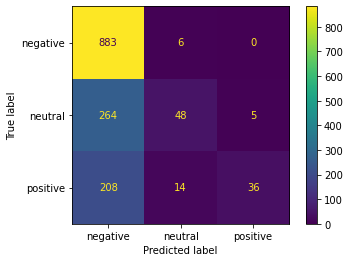

In [91]:
report(nb)

              precision    recall  f1-score   support

    negative       0.79      0.94      0.86       889
     neutral       0.62      0.46      0.53       317
    positive       0.83      0.58      0.68       258

    accuracy                           0.77      1464
   macro avg       0.75      0.66      0.69      1464
weighted avg       0.76      0.77      0.76      1464



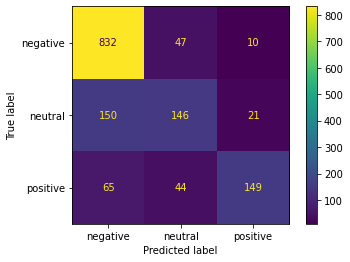

In [92]:
report(log_model)

              precision    recall  f1-score   support

    negative       0.78      0.95      0.85       889
     neutral       0.64      0.39      0.49       317
    positive       0.81      0.57      0.67       258

    accuracy                           0.76      1464
   macro avg       0.74      0.64      0.67      1464
weighted avg       0.75      0.76      0.74      1464



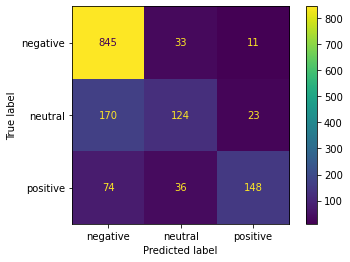

In [93]:
report(rbf_svc)

              precision    recall  f1-score   support

    negative       0.83      0.90      0.86       889
     neutral       0.59      0.52      0.55       317
    positive       0.77      0.64      0.70       258

    accuracy                           0.77      1464
   macro avg       0.73      0.69      0.70      1464
weighted avg       0.77      0.77      0.77      1464



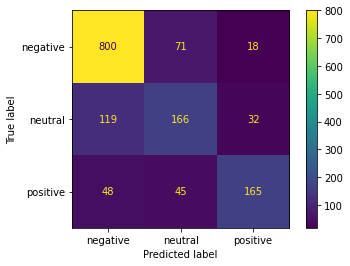

In [94]:
report(linear_svc)

In [61]:
# сбалансируем классы и поиграемся с гиперпараметрами наиболее удачной модели

linear_svc = LinearSVC(class_weight='balanced', penalty= 'l2')

param_grid = {'C': np.linspace(0.1,10,20),
              'tol': np.linspace(0.01, 0.5, 10)} 


final_model_1 = GridSearchCV(linear_svc, param_grid, verbose=2)
final_model_1.fit(X_train_vec, y_train)

final_model_1.best_params_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV] END ....................................C=0.1, tol=0.01; total time=   0.0s
[CV] END ....................................C=0.1, tol=0.01; total time=   0.0s
[CV] END ....................................C=0.1, tol=0.01; total time=   0.0s
[CV] END ....................................C=0.1, tol=0.01; total time=   0.0s
[CV] END ....................................C=0.1, tol=0.01; total time=   0.0s
[CV] END .....................C=0.1, tol=0.06444444444444444; total time=   0.0s
[CV] END .....................C=0.1, tol=0.06444444444444444; total time=   0.0s
[CV] END .....................C=0.1, tol=0.06444444444444444; total time=   0.0s
[CV] END .....................C=0.1, tol=0.06444444444444444; total time=   0.0s
[CV] END .....................C=0.1, tol=0.06444444444444444; total time=   0.0s
[CV] END .....................C=0.1, tol=0.11888888888888888; total time=   0.0s
[CV] END .....................C=0.1, tol=0.11

[CV] END ......................C=1.142105263157895, tol=0.01; total time=   0.0s
[CV] END ......................C=1.142105263157895, tol=0.01; total time=   0.1s
[CV] END ......................C=1.142105263157895, tol=0.01; total time=   0.1s
[CV] END .......C=1.142105263157895, tol=0.06444444444444444; total time=   0.0s
[CV] END .......C=1.142105263157895, tol=0.06444444444444444; total time=   0.0s
[CV] END .......C=1.142105263157895, tol=0.06444444444444444; total time=   0.0s
[CV] END .......C=1.142105263157895, tol=0.06444444444444444; total time=   0.0s
[CV] END .......C=1.142105263157895, tol=0.06444444444444444; total time=   0.0s
[CV] END .......C=1.142105263157895, tol=0.11888888888888888; total time=   0.0s
[CV] END .......C=1.142105263157895, tol=0.11888888888888888; total time=   0.0s
[CV] END .......C=1.142105263157895, tol=0.11888888888888888; total time=   0.1s
[CV] END .......C=1.142105263157895, tol=0.11888888888888888; total time=   0.0s
[CV] END .......C=1.14210526

[CV] END .......................C=2.18421052631579, tol=0.01; total time=   0.1s
[CV] END ........C=2.18421052631579, tol=0.06444444444444444; total time=   0.1s
[CV] END ........C=2.18421052631579, tol=0.06444444444444444; total time=   0.1s
[CV] END ........C=2.18421052631579, tol=0.06444444444444444; total time=   0.2s
[CV] END ........C=2.18421052631579, tol=0.06444444444444444; total time=   0.1s
[CV] END ........C=2.18421052631579, tol=0.06444444444444444; total time=   0.0s
[CV] END ........C=2.18421052631579, tol=0.11888888888888888; total time=   0.1s
[CV] END ........C=2.18421052631579, tol=0.11888888888888888; total time=   0.1s
[CV] END ........C=2.18421052631579, tol=0.11888888888888888; total time=   0.0s
[CV] END ........C=2.18421052631579, tol=0.11888888888888888; total time=   0.0s
[CV] END ........C=2.18421052631579, tol=0.11888888888888888; total time=   0.0s
[CV] END ........C=2.18421052631579, tol=0.17333333333333334; total time=   0.0s
[CV] END ........C=2.1842105

[CV] END ......C=3.2263157894736847, tol=0.06444444444444444; total time=   0.1s
[CV] END ......C=3.2263157894736847, tol=0.06444444444444444; total time=   0.1s
[CV] END ......C=3.2263157894736847, tol=0.06444444444444444; total time=   0.1s
[CV] END ......C=3.2263157894736847, tol=0.06444444444444444; total time=   0.1s
[CV] END ......C=3.2263157894736847, tol=0.11888888888888888; total time=   0.1s
[CV] END ......C=3.2263157894736847, tol=0.11888888888888888; total time=   0.1s
[CV] END ......C=3.2263157894736847, tol=0.11888888888888888; total time=   0.1s
[CV] END ......C=3.2263157894736847, tol=0.11888888888888888; total time=   0.1s
[CV] END ......C=3.2263157894736847, tol=0.11888888888888888; total time=   0.1s
[CV] END ......C=3.2263157894736847, tol=0.17333333333333334; total time=   0.0s
[CV] END ......C=3.2263157894736847, tol=0.17333333333333334; total time=   0.1s
[CV] END ......C=3.2263157894736847, tol=0.17333333333333334; total time=   0.0s
[CV] END ......C=3.226315789

[CV] END .......C=4.268421052631579, tol=0.06444444444444444; total time=   0.1s
[CV] END .......C=4.268421052631579, tol=0.06444444444444444; total time=   0.3s
[CV] END .......C=4.268421052631579, tol=0.11888888888888888; total time=   0.2s
[CV] END .......C=4.268421052631579, tol=0.11888888888888888; total time=   0.1s
[CV] END .......C=4.268421052631579, tol=0.11888888888888888; total time=   0.1s
[CV] END .......C=4.268421052631579, tol=0.11888888888888888; total time=   0.1s
[CV] END .......C=4.268421052631579, tol=0.11888888888888888; total time=   0.1s
[CV] END .......C=4.268421052631579, tol=0.17333333333333334; total time=   0.1s
[CV] END .......C=4.268421052631579, tol=0.17333333333333334; total time=   0.1s
[CV] END .......C=4.268421052631579, tol=0.17333333333333334; total time=   0.1s
[CV] END .......C=4.268421052631579, tol=0.17333333333333334; total time=   0.1s
[CV] END .......C=4.268421052631579, tol=0.17333333333333334; total time=   0.1s
[CV] END .......C=4.26842105

[CV] END .......C=5.310526315789474, tol=0.11888888888888888; total time=   0.2s
[CV] END .......C=5.310526315789474, tol=0.11888888888888888; total time=   0.2s
[CV] END .......C=5.310526315789474, tol=0.11888888888888888; total time=   0.1s
[CV] END .......C=5.310526315789474, tol=0.11888888888888888; total time=   0.2s
[CV] END .......C=5.310526315789474, tol=0.11888888888888888; total time=   0.2s
[CV] END .......C=5.310526315789474, tol=0.17333333333333334; total time=   0.1s
[CV] END .......C=5.310526315789474, tol=0.17333333333333334; total time=   0.2s
[CV] END .......C=5.310526315789474, tol=0.17333333333333334; total time=   0.2s
[CV] END .......C=5.310526315789474, tol=0.17333333333333334; total time=   0.1s
[CV] END .......C=5.310526315789474, tol=0.17333333333333334; total time=   0.1s
[CV] END .......C=5.310526315789474, tol=0.22777777777777777; total time=   0.1s
[CV] END .......C=5.310526315789474, tol=0.22777777777777777; total time=   0.2s
[CV] END .......C=5.31052631

[CV] END .......C=6.352631578947369, tol=0.11888888888888888; total time=   0.2s
[CV] END .......C=6.352631578947369, tol=0.11888888888888888; total time=   0.1s
[CV] END .......C=6.352631578947369, tol=0.11888888888888888; total time=   0.2s
[CV] END .......C=6.352631578947369, tol=0.17333333333333334; total time=   0.1s
[CV] END .......C=6.352631578947369, tol=0.17333333333333334; total time=   0.2s
[CV] END .......C=6.352631578947369, tol=0.17333333333333334; total time=   0.2s
[CV] END .......C=6.352631578947369, tol=0.17333333333333334; total time=   0.1s
[CV] END .......C=6.352631578947369, tol=0.17333333333333334; total time=   0.1s
[CV] END .......C=6.352631578947369, tol=0.22777777777777777; total time=   0.1s
[CV] END .......C=6.352631578947369, tol=0.22777777777777777; total time=   0.2s
[CV] END .......C=6.352631578947369, tol=0.22777777777777777; total time=   0.1s
[CV] END .......C=6.352631578947369, tol=0.22777777777777777; total time=   0.1s
[CV] END .......C=6.35263157

[CV] END .......C=7.394736842105264, tol=0.11888888888888888; total time=   0.2s
[CV] END .......C=7.394736842105264, tol=0.17333333333333334; total time=   0.2s
[CV] END .......C=7.394736842105264, tol=0.17333333333333334; total time=   0.2s
[CV] END .......C=7.394736842105264, tol=0.17333333333333334; total time=   0.2s
[CV] END .......C=7.394736842105264, tol=0.17333333333333334; total time=   0.2s
[CV] END .......C=7.394736842105264, tol=0.17333333333333334; total time=   0.1s
[CV] END .......C=7.394736842105264, tol=0.22777777777777777; total time=   0.2s
[CV] END .......C=7.394736842105264, tol=0.22777777777777777; total time=   0.2s
[CV] END .......C=7.394736842105264, tol=0.22777777777777777; total time=   0.1s
[CV] END .......C=7.394736842105264, tol=0.22777777777777777; total time=   0.2s
[CV] END .......C=7.394736842105264, tol=0.22777777777777777; total time=   0.1s
[CV] END ........C=7.394736842105264, tol=0.2822222222222222; total time=   0.2s
[CV] END ........C=7.3947368

[CV] END .......C=8.436842105263159, tol=0.17333333333333334; total time=   0.2s
[CV] END .......C=8.436842105263159, tol=0.17333333333333334; total time=   0.2s
[CV] END .......C=8.436842105263159, tol=0.17333333333333334; total time=   0.2s
[CV] END .......C=8.436842105263159, tol=0.17333333333333334; total time=   0.3s
[CV] END .......C=8.436842105263159, tol=0.22777777777777777; total time=   0.2s
[CV] END .......C=8.436842105263159, tol=0.22777777777777777; total time=   0.2s
[CV] END .......C=8.436842105263159, tol=0.22777777777777777; total time=   0.2s
[CV] END .......C=8.436842105263159, tol=0.22777777777777777; total time=   0.2s
[CV] END .......C=8.436842105263159, tol=0.22777777777777777; total time=   0.2s
[CV] END ........C=8.436842105263159, tol=0.2822222222222222; total time=   0.2s
[CV] END ........C=8.436842105263159, tol=0.2822222222222222; total time=   0.2s
[CV] END ........C=8.436842105263159, tol=0.2822222222222222; total time=   0.2s
[CV] END ........C=8.4368421

[CV] END .......C=9.478947368421053, tol=0.17333333333333334; total time=   0.2s
[CV] END .......C=9.478947368421053, tol=0.17333333333333334; total time=   0.2s
[CV] END .......C=9.478947368421053, tol=0.22777777777777777; total time=   0.2s
[CV] END .......C=9.478947368421053, tol=0.22777777777777777; total time=   0.2s
[CV] END .......C=9.478947368421053, tol=0.22777777777777777; total time=   0.2s
[CV] END .......C=9.478947368421053, tol=0.22777777777777777; total time=   0.2s
[CV] END .......C=9.478947368421053, tol=0.22777777777777777; total time=   0.2s
[CV] END ........C=9.478947368421053, tol=0.2822222222222222; total time=   0.2s
[CV] END ........C=9.478947368421053, tol=0.2822222222222222; total time=   0.2s
[CV] END ........C=9.478947368421053, tol=0.2822222222222222; total time=   0.2s
[CV] END ........C=9.478947368421053, tol=0.2822222222222222; total time=   0.2s
[CV] END ........C=9.478947368421053, tol=0.2822222222222222; total time=   0.2s
[CV] END .......C=9.47894736

{'C': 0.1, 'tol': 0.11888888888888888}

              precision    recall  f1-score   support

    negative       0.83      0.89      0.86       889
     neutral       0.57      0.54      0.55       317
    positive       0.76      0.65      0.70       258

    accuracy                           0.77      1464
   macro avg       0.72      0.69      0.70      1464
weighted avg       0.76      0.77      0.76      1464



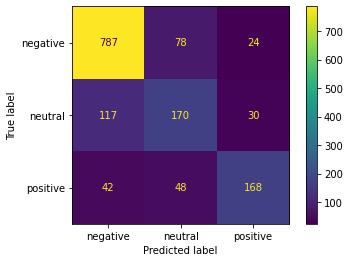

In [62]:
report(final_model_2)

              precision    recall  f1-score   support

    negative       0.85      0.87      0.86       889
     neutral       0.57      0.56      0.57       317
    positive       0.75      0.68      0.71       258

    accuracy                           0.77      1464
   macro avg       0.72      0.70      0.71      1464
weighted avg       0.77      0.77      0.77      1464



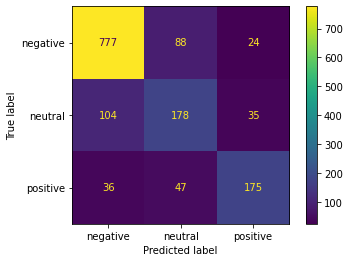

In [68]:
# покрутим некоторые гиперпараметры вокруг наиболее удачных комбинаций из предыдущего шага

linear_svc = LinearSVC(class_weight='balanced')
linear_svc.fit(X_train_vec, y_train)

param_grid = {'C': np.linspace(0.01,5,20),
              'tol': np.linspace(0.0001, 0.5, 20)} 


final_model_2 = GridSearchCV(linear_svc, param_grid, verbose=2)
final_model_2.fit(X_train_vec, y_train)
report(final_model_2)


In [67]:
final_model_2.best_params_

{'C': 0.27263157894736845, 'tol': 0.2895157894736842}

In [ ]:
# Итоги:
    
# Классическая модель LinearSVC с параметрами по умолчанию показывает чуть более лучшие
# результаты для детекции негативных комментариев.
# Модель final_model_2 показывает чуть более лучшие результаты по нейтральным и хорошим отзывам.

# Дальнейший выбор рабочей модели зависит от целей.

In [111]:
# Протестируем несколько отзывов с сайта 
# https://www.airlinequality.com/airline-reviews/virgin-america/

from sklearn.pipeline import Pipeline

pipe = Pipeline([('tfidf',TfidfVectorizer()),('svc',LinearSVC())])
pipe.fit(df['text'],df['airline_sentiment'])
new_tweet = ['I flew jetBlue out to Boston drove up to Albany then down to JFK. As you can imagine I was tired. Takeoff was scary I could see the end of the runway while we were still rolling but otherwise pretty good. Plane not so clean found gum on my armrest. Cabin crew did nothing about it. Inflight entertainment good only it kept freezing. Seven bucks for internet access was steep so I decided to watch TV instead. It was OK only signal a little corrupt and couldnt see well. Also not a whole lot of channels. Dont be fooled by their low fares. Once you board you should be prepared to spend about fifty extra for a decent flight.']
pipe.predict(new_tweet)

array(['negative'], dtype=object)

In [112]:
new_2_tweet = ['Great check in and upgraded for small cost. Almost the same price to pay for my 2 bags in economy. Seat excellent staff excellent service excellent and entertainment excellent. Selection of snacks not excellent. Captain made an introduction speech from the cabin which I felt was also an excellent touch. Definitely a notch above Jet Blue and Southwest']
pipe.predict(new_2_tweet)

array(['positive'], dtype=object)